In [8]:
# TrainBaseModel.ipynb

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import os








In [9]:
#Step 1: Load Dataset from DataLoader  module
image_size = (180, 180)
batch_size = 16

train_ds, val_ds = tf.keras.utils.image_dataset_from_directory(
    "food_6",
    validation_split=0.2,
    subset="both",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
    label_mode="categorical",
)


Found 400 files belonging to 4 classes.
Using 320 files for training.
Using 80 files for validation.


In [10]:
#  Step 2: Setup Transfer Learning Base Model 
base_model = keras.applications.MobileNetV2(
    input_shape=image_size + (3,),
    include_top=False,
    weights="imagenet"
)
base_model.trainable = False  # Freeze base model


/tmp/ipykernel_2646/1179456457.py:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = keras.applications.MobileNetV2(


In [13]:

#  Step 3: Add Classification Head 
inputs = keras.Input(shape=image_size + (3,))
x = keras.applications.mobilenet_v2.preprocess_input(inputs)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(4, activation="softmax")(x)
model = keras.Model(inputs, outputs)


In [14]:
#  Step 4: Compile and Train 
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.CategoricalCrossentropy(),
    metrics=["accuracy"]
)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20
)

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 277ms/step - accuracy: 0.4133 - loss: 1.4981 - val_accuracy: 0.6625 - val_loss: 0.8182
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 208ms/step - accuracy: 0.6512 - loss: 0.8542 - val_accuracy: 0.8000 - val_loss: 0.5050
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 230ms/step - accuracy: 0.8326 - loss: 0.4606 - val_accuracy: 0.8125 - val_loss: 0.4174
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 296ms/step - accuracy: 0.8285 - loss: 0.4475 - val_accuracy: 0.8875 - val_loss: 0.3779
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 268ms/step - accuracy: 0.9137 - loss: 0.2581 - val_accuracy: 0.8500 - val_loss: 0.3416
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 262ms/step - accuracy: 0.9070 - loss: 0.2670 - val_accuracy: 0.8625 - val_loss: 0.3596
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 272ms/step - accuracy: 0.9425 - loss: 0.2152 - val_accuracy: 0.8750 - val_loss: 0.3184
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 261ms/step - accuracy: 0.9716 - loss: 0.1458 - val_accuracy: 0.

In [15]:
model.save("baseline_model.keras")


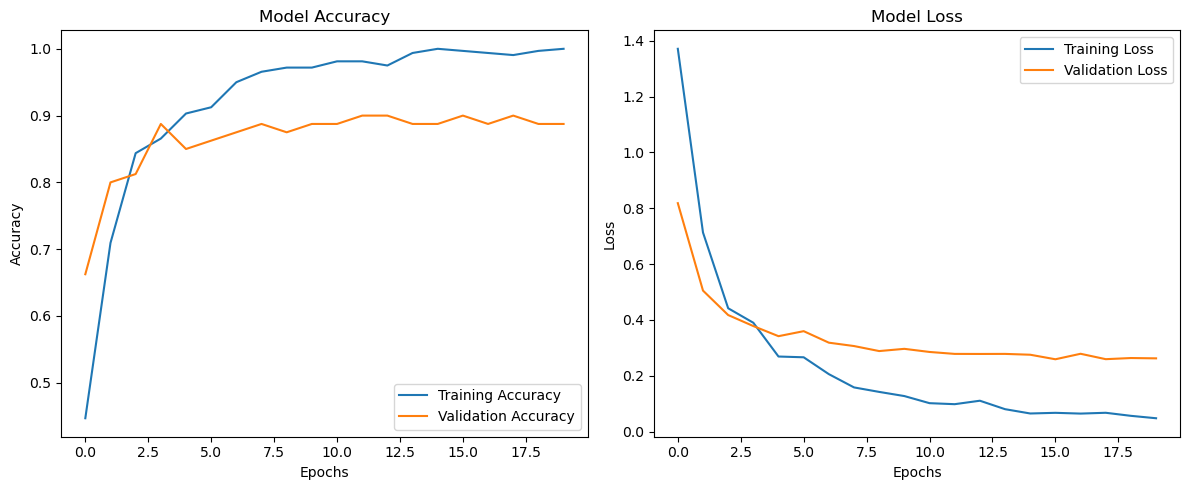

In [18]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot Accuracy
axs[0].plot(range(len(history.history["accuracy"])), history.history["accuracy"], label="Training Accuracy")
axs[0].plot(range(len(history.history["val_accuracy"])), history.history["val_accuracy"], label="Validation Accuracy")
axs[0].set_title("Model Accuracy")
axs[0].set_xlabel("Epochs")
axs[0].set_ylabel("Accuracy")
axs[0].legend()

# Plot Loss
axs[1].plot(range(len(history.history["loss"])), history.history["loss"], label="Training Loss")
axs[1].plot(range(len(history.history["val_loss"])), history.history["val_loss"], label="Validation Loss")
axs[1].set_title("Model Loss")
axs[1].set_xlabel("Epochs")
axs[1].set_ylabel("Loss")
axs[1].legend()

plt.tight_layout()
plt.show()
